In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Binarizer, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [167]:
df1 = pd.read_csv('../practical4/Iris.csv',index_col=0)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [101]:
X = df1.drop('Species', axis=1)
y = df1['Species']

In [102]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [103]:
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [104]:
std = StandardScaler()
std_feat = std.fit_transform(X)
X_std = pd.DataFrame(std_feat, columns=X.columns)
X_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [105]:
X_std.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [106]:
mms = MinMaxScaler(feature_range=(0,1))
mms_feat = mms.fit_transform(X)
X_mms = pd.DataFrame(mms_feat, columns=X.columns)
X_mms

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [107]:
X_mms.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [108]:
rbs = RobustScaler()
rbs_feat = rbs.fit_transform(X)
X_rbs = pd.DataFrame(rbs_feat, columns=X.columns)
X_rbs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


In [109]:
norm = Normalizer()
norm_feat = norm.fit_transform(X)
X_norm = pd.DataFrame(norm_feat, columns=X.columns)
X_norm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [110]:
X_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.751621,0.404780,0.454958,0.140965
std,0.044619,0.105087,0.159747,0.078136
min,0.653877,0.238392,0.167836,0.014727
25%,0.715261,0.326738,0.250925,0.048734
50%,0.754883,0.354371,0.536367,0.164148
75%,0.788419,0.525237,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


In [111]:
bnz = Binarizer(threshold=0)
bnz_feat = bnz.fit_transform(X)
X_bnz = pd.DataFrame(bnz_feat, columns=X.columns)
X_bnz

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
145,1.0,1.0,1.0,1.0
146,1.0,1.0,1.0,1.0
147,1.0,1.0,1.0,1.0
148,1.0,1.0,1.0,1.0


In [112]:
imputer = SimpleImputer(strategy='mean')
imp_feat = imputer.fit_transform(X)
X_imp = pd.DataFrame(imp_feat, columns=X.columns)
X_imp

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [113]:
# Formward Fill
df1 = df1.ffill()

In [114]:
lbenc = LabelEncoder()
lbenc_feat = lbenc.fit_transform(y)
y_lbenc = pd.Series(lbenc_feat)
y_lbenc

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [ ]:
ohenc = OneHotEncoder(sparse_output=False)
ohenc_feat = ohenc.fit_transform(X)
X_ohenc = pd.Series(ohenc_feat)
X_ohenc

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
pca = PCA()
pca_feat = pca.fit_transform(X)
X_pca = pd.DataFrame(pca_feat)
X_pca

,0,1,2,3
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082
146,1.525664,-0.375021,-0.120636,0.255723
147,1.764046,0.078519,0.130784,0.136295
148,1.901629,0.115877,0.722874,0.040873


In [119]:
pca_var = pca.explained_variance_ratio_
pca_var

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

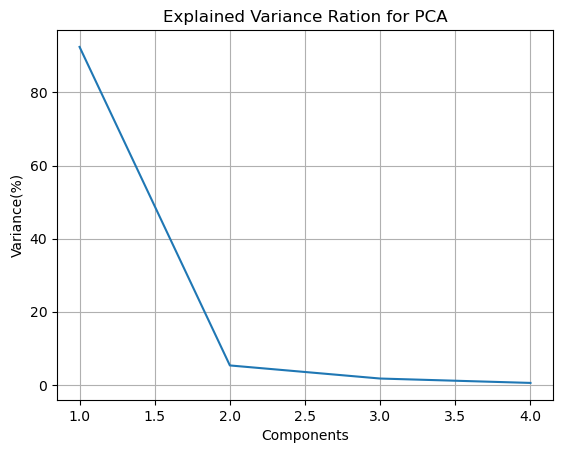

In [120]:
plt.plot(range(1,len(pca_var)+1), pca_var*100)
plt.title("Explained Variance Ration for PCA")
plt.xlabel("Components")
plt.ylabel("Variance(%)")
plt.grid()
plt.show()

In [123]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
X_pca = pd.DataFrame(pca_feat, columns=["PC1", "PC2"])
X_pca

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [124]:
df1_pca = pd.concat([X_pca, y], axis=1)
df1_pca

,PC1,PC2,Species
0,-2.684207,0.326607,NaN
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica
149,1.389666,-0.282887,Iris-virginica


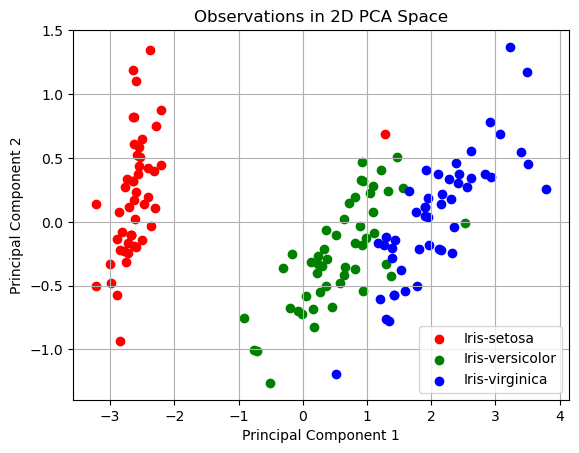

In [130]:
colors = ["red", "green", "blue"]
species_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for sp, cl in zip(species_names, colors):
    sp_class = df1_pca["Species"] == sp
    plt.scatter(df1_pca.loc[sp_class,"PC1"], df1_pca.loc[sp_class,"PC2"], c=cl, label=sp)
    plt.legend()
    plt.grid()
    plt.title('Observations in 2D PCA Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

In [137]:
# Classification
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
y_lda = lda.predict(X_test)
accuracy_score(y_test, y_lda)*100

100.0

In [139]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

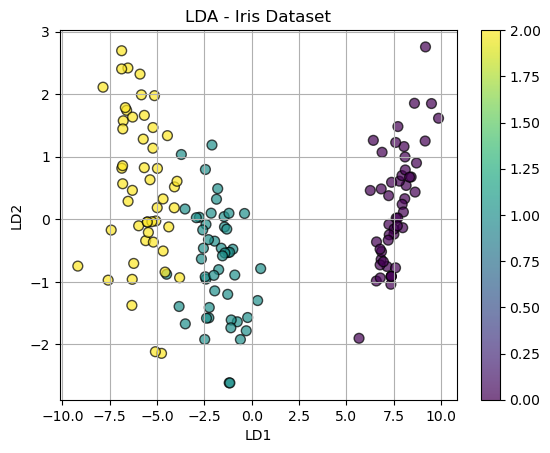

In [161]:
c_map = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=c_map, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.title('LDA - Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.colorbar()
plt.grid()
plt.show()

In [196]:
df2 = pd.read_csv('../practical4/wine_data.csv')
df2.head()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [197]:
X_df2 = df2.drop('class_label', axis=1)
y_df2 = df2['class_label']

In [198]:
X_df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [199]:
y_df2.head()

0    1
1    1
2    1
3    1
4    1
Name: class_label, dtype: int64

In [200]:
std = StandardScaler()
X_df2_std = std.fit_transform(X_df2)
X_df2_std_df = pd.DataFrame(X_df2_std, columns=X.columns)
X_df2_std_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


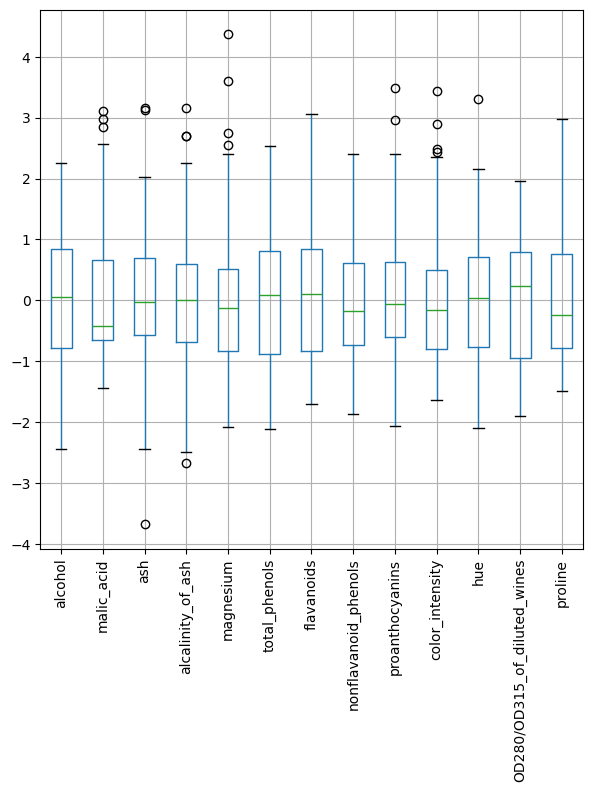

In [181]:
plt.figure(figsize=(7, 7))
X_df2_std_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [182]:
X_df2_std_df.cov()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
alcohol,1.005650,0.094930,0.212740,-0.311988,0.272328,0.290734,0.238153,-0.156810,0.137470,0.549451,-0.072153,0.072752,0.647357
malic_acid,0.094930,1.005650,0.164972,0.290130,-0.054883,-0.337061,-0.413329,0.294632,-0.221993,0.250392,-0.564467,-0.370794,-0.193095
ash,0.212740,0.164972,1.005650,0.445872,0.288206,0.129708,0.115727,0.187283,0.009706,0.260350,-0.075089,0.003933,0.224890
alcalinity_of_ash,-0.311988,0.290130,0.445872,1.005650,-0.083804,-0.322928,-0.353355,0.363966,-0.198442,0.018838,-0.275503,-0.278332,-0.443086
magnesium,0.272328,-0.054883,0.288206,-0.083804,1.005650,0.215613,0.196890,-0.257742,0.237776,0.201080,0.055711,0.066377,0.395573
total_phenols,0.290734,-0.337061,0.129708,-0.322928,0.215613,1.005650,0.869448,-0.452477,0.615873,-0.055448,0.436132,0.703904,0.500929
flavanoids,0.238153,-0.413329,0.115727,-0.353355,0.196890,0.869448,1.005650,-0.540939,0.656379,-0.173353,0.546549,0.791641,0.496985
nonflavanoid_phenols,-0.156810,0.294632,0.187283,0.363966,-0.257742,-0.452477,-0.540939,1.005650,-0.367912,0.139843,-0.264123,-0.506113,-0.313144
proanthocyanins,0.137470,-0.221993,0.009706,-0.198442,0.237776,0.615873,0.656379,-0.367912,1.005650,-0.025393,0.297214,0.522000,0.332283
color_intensity,0.549451,0.250392,0.260350,0.018838,0.201080,-0.055448,-0.173353,0.139843,-0.025393,1.005650,-0.524761,-0.431238,0.317886


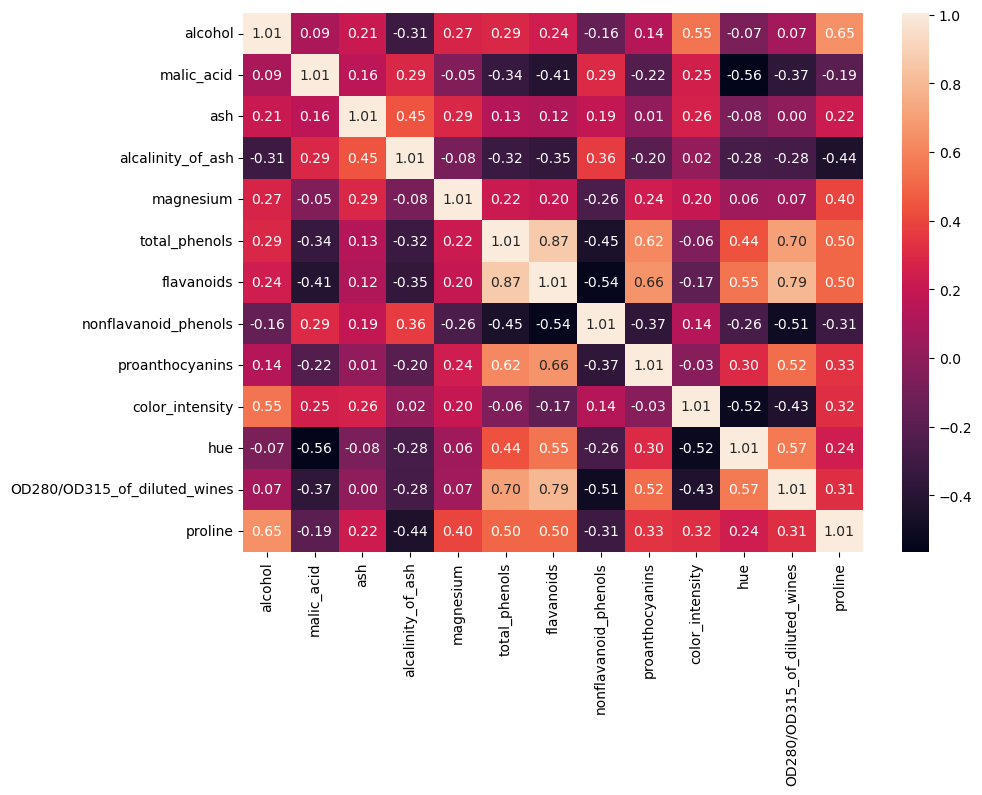

In [194]:
plt.figure(figsize=(10, 7))
sns.heatmap(X_df2_std_df.cov(), annot=True, fmt='.2f')
plt.show()

In [195]:
pca_wine = PCA(n_components=2)
X_pca_wine = pca_wine.fit_transform(X_df2_std)
X_pca_wine_df = pd.DataFrame(X_pca_wine, columns=['PC1', 'PC2'])
X_pca_wine_df

,PC1,PC2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831
...,...,...
173,-3.370524,2.216289
174,-2.601956,1.757229
175,-2.677839,2.760899
176,-2.387017,2.297347


In [201]:
df_pca_wine = pd.concat([X_pca_wine_df, y_df2], axis=1)
df_pca_wine

,PC1,PC2,class_label
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1
...,...,...,...
173,-3.370524,2.216289,3
174,-2.601956,1.757229,3
175,-2.677839,2.760899,3
176,-2.387017,2.297347,3


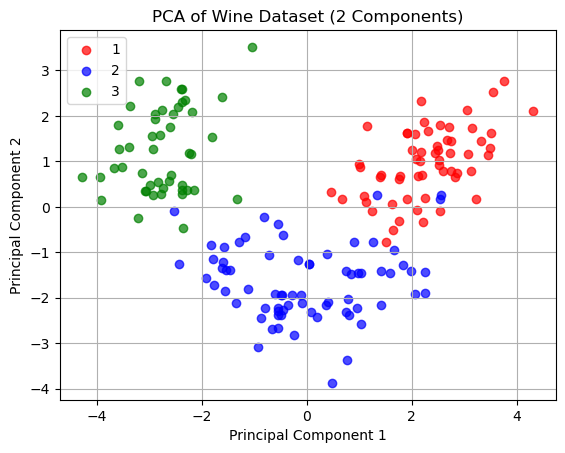

In [213]:
colors=['red', 'blue', 'green']
for label, c in zip(df_pca_wine['class_label'].unique(), colors):
    label_class = df_pca_wine['class_label'] == label
    plt.scatter(df_pca_wine.loc[label_class,'PC1'], df_pca_wine.loc[label_class,'PC2'], c=c, label=label, alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Wine Dataset (2 Components)')
    plt.grid()
    plt.legend()

In [232]:
# PCA on digits dataset
digits = load_digits()

In [233]:
X_digits = digits.data
y_digits = digits.target

In [234]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [235]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [236]:
scaler = StandardScaler()
X_digits_sc = scaler.fit_transform(X_digits)

In [243]:
pca_digits = PCA()
pca_digits.fit(X_digits_sc)
pca_digits_tr = pca_digits.fit_transform(X_digits_sc)

In [238]:
pca_digits.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

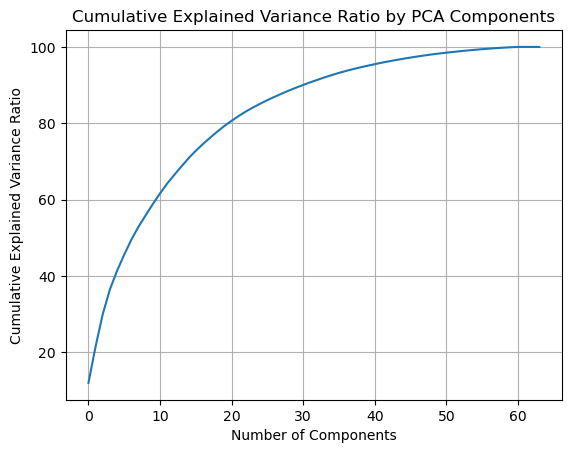

In [241]:
plt.plot(np.cumsum(pca_digits.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()

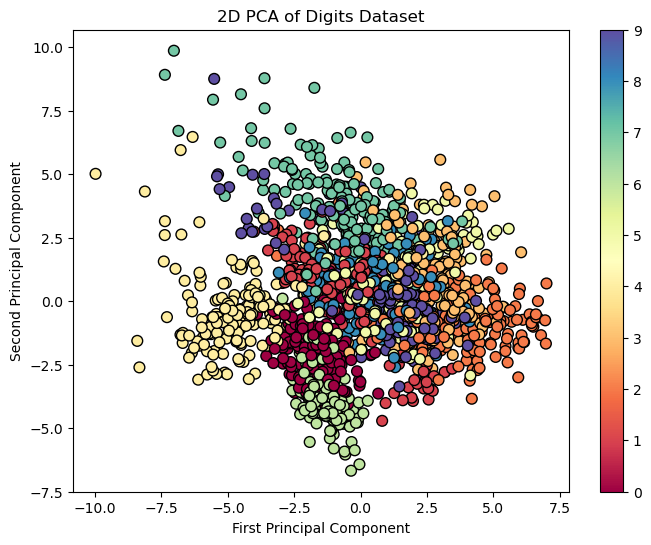

In [244]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_digits_tr[:, 0], pca_digits_tr[:, 1], c=y, cmap='Spectral', edgecolor='k', s=60)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA of Digits Dataset')
plt.show()

In [245]:
# Add noise to the dataset
noise_factor = 0.5
X_noisy = X_digits_sc + noise_factor * np.random.normal(size=X_digits_sc.shape)

In [246]:
X_pca_noisy = pca_digits.fit_transform(X_noisy)

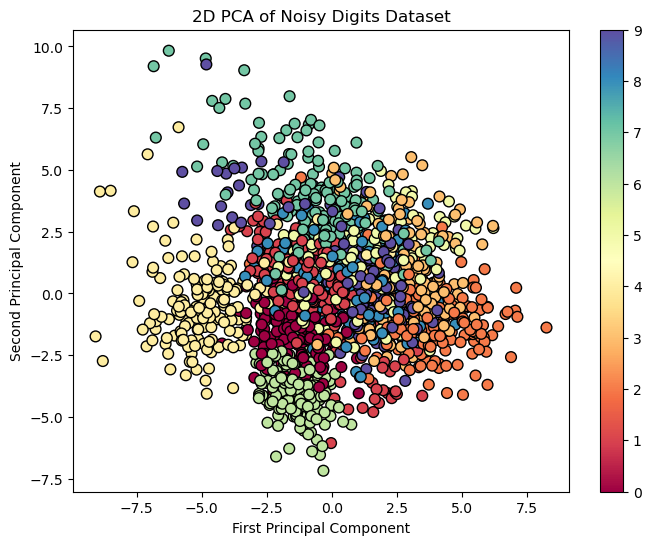

In [247]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_noisy[:, 0], X_pca_noisy[:, 1], c=y, cmap='Spectral', edgecolor='k', s=60)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA of Noisy Digits Dataset')
plt.show()